In [1]:
cd ..

/Users/yanndubois/SSL-Risk-Decomposition


In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
#!rm -rf /Users/yanndubois/.cache/torch/hub/YannDubs_SSL-Risk-Decomposition_main

# Collect all results

In [4]:
import torch
import pandas as pd
from utils.plotting import *
from utils.collect_results import *
from utils.causal import *
import numpy as np
import warnings
import logging
import hubconf

 No module named 'clip'


In [5]:
is_subset=False
is_read_files=True
if is_subset:
    DATA = "imagenet-S0.01"
    subset = 0.01
    pred = 'sk_logistic_hypopt'
    threshold_kwargs=dict(threshold_bad_ifnew=70,
                           threshold_delta=100 # don't use
                          )
else:
    DATA = "imagenet"
    subset = None
    pred = 'torch_linear_delta_hypopt'
    threshold_kwargs=dict()
    

metadata_df = hubconf.metadata_df(is_multiindex=False)

if is_read_files:
    results = load_all_results(pattern=f"**/data_{DATA}/**/pred_{pred}/seed_*/results_all.csv",
                               skip_ifneq=dict(data=DATA.lower()),
                               skip_ifin=dict(ssl=["swav_rn50w5","selav2_rn50_ep400_2x160_4x96"]),
                              )
    check_missing(results, metadata_df)
    results = format_approx_results(results, metadata_df, f_replace_arch=f_replace_arch, subset=subset)
    results = make_risk_decomposition(results, traverse_path=["down","right","down"], is_print=True, subset=subset)
    results, metadata_df = clean_results(results, metadata_df, predictor=pred)
    validate_results(results, metadata_df, threshold_delta=5, **threshold_kwargs)

    # filter out values that are suspiciously bad
    to_del = ["selav2_rn50_ep400_2x160_4x96"]
    to_keep = [i for i in results.index.get_level_values("enc") if i not in to_del]
    results = results.loc[to_keep]

    results.to_csv(f"notebooks/saved/results_{DATA}_{pred}.csv")
else:
    results=pd.read_csv(f"notebooks/saved/results_{DATA}_{pred}.csv",index_col=0)
    
    
metadata_df = metadata_df.loc[to_keep]
df = pd.concat([results,metadata_df], axis=1)
df = df.replace(dict(ssl_mode={"hierarchical contrastive": "hierarchical"}))
df["n_augmentations"] = df["augmentations"].apply(lambda s: len(s))

# coarsens many different parameters for cleaner plots
#df = preprocess_features(df, round_dict={}, pow_dict={})

melted = melt(df)

Found 153 result files to load.


Found missing supervised models for:


pred seed         arch
0  torch_linear_delta_hypopt  123    vitl7 cls
1  torch_linear_delta_hypopt  123    vitb4 cls
2  torch_linear_delta_hypopt  123  resnet50w64
3  torch_linear_delta_hypopt  123  resnet50w16
4  torch_linear_delta_hypopt  123   resnet50w4
5  torch_linear_delta_hypopt  123   resnet50w4
6  torch_linear_delta_hypopt  123   resnet50w4
7  torch_linear_delta_hypopt  123   vith14 cls
8  torch_linear_delta_hypopt  123    vits8 cls

[usability] = [train_train] - [sup_train_train]
[probe_gen] = [train-cmplmnt-ntest_train-sbst-ntest] - [train_train]
[enc_gen] = [train_test] - [train-cmplmnt-ntest_train-sbst-ntest]


Found negative values:


approx  usability  probe_gen  enc_gen  agg_risk
enc                                                                           
dino_vitb16_extracts            1.548     -0.737     18.231    4.530    23.572
dissl_resnet50_d4096_e100_m2    0.845     -0.354     32.503   -0.148    32.846
dissl_resnet50_d8192_e100_m2    0.845     -0.189     31.620    1.302    33.578
dissl_resnet50_d8192_e400_m6    0.845     -0.381     24.064    3.816    28.344
dissl_resnet50_d8192_e800_m8    0.845     -0.382     23.417    4.124    28.004
mugs_vitb16_ep400_extractb      7.634     -5.555     15.023    3.266    20.368
pirl_rn50w2_headmlp             0.743     -0.091     25.429    3.422    29.502
simclr_resnet50_d8192_e100_m2   0.845     -0.381     29.967    3.488    33.920
simclr_rn50w2                   0.743     -0.271     22.044    3.544    26.060
simclr_rn50w2_ep100             0.743     -0.269     27.173    3.060    30.706
swav_rn50w2                     0.743     -0.495     20.696    3.036    23.980
vicreg_rn50w2                   0.743     -0.487     22.096    2.974    25.326

The following results seem suspicously bad:


agg_risk
enc                        
beit_vitb16_pt22k    57.194

The following models have very different original and evalauted performance:


enc
deepcluster_rn50_bs512_ep200_mmselfsup   -17.566000
dissl_resnet50_dnone_e100_m2               5.037999
jigsaw_rn50                               10.766001
jigsaw_rn50_in22k                         17.584002
msn_vitl16_ep600                           6.359999
rotnet_rn50_in1k                           7.164002
rotnet_rn50_in22k                          7.314002
simclr_rn50_bs256_ep200_mmselfsup          6.275999
speccl_bs384_ep100                         5.306000
dtype: float64

The following results have some nan:


approx  usability  probe_gen  enc_gen  agg_risk
enc                                                             
clip_rn50x16        NaN        NaN     16.622    1.060    18.300
clip_rn50x4         NaN        NaN     19.626    1.390    21.516
clip_rn50x64        NaN        NaN     14.492    1.734    16.718
dino_vits8_last     NaN        NaN      4.449    3.818    21.794
mae_vith14          NaN        NaN     14.514    3.466    24.008
msn_vitb4_ep300     NaN        NaN      9.153    4.828    19.906
msn_vitl7_ep200     NaN        NaN     11.950    5.110    20.094
simclr_rn50w4       NaN        NaN     24.814    3.862    29.138
swav_rn50w4         NaN        NaN     19.848    3.668    23.760

In [6]:
#non_core_params = ['date_published','top1acc_in1k_official','projection_nparameters']
core_params = ['objective','version','architecture','patch_size','z_dim','z_layer',
               "epochs","batch_size", "optimizer", "learning_rate", "weight_decay", "scheduler",
               "pretraining_data",'img_size','year',"nviews",'finetuning_data','projection_arch', 
               "n_augmentations", "other"]#, "pred_dim"
minimal_params = ['objective','version','architecture','patch_size','z_dim','z_layer',"pretraining_data",'finetuning_data']
df_core = df.set_index(core_params)[results.columns]
df_minimal = df.set_index(minimal_params)[results.columns]
melted_onlyComp = melt(df, components=COMPONENTS_ONLY)


And so it is useful to think about how people chose how many epochs to train there models for. Typically researchers write papers about an SSL objective on a standard benchmark (say RN50 on Imagenet). And so the highest level choice is the benchmark (arch + data) and objective (those interact with one another in a non trivial way but this is not important for our case). Once THose 

## Controlled analysis: line curves
In the previous notebook we tried to analyse all models and components globally, now let us try considering the effect of specific more carefully.

### Effect of epochs
Let's analyze the effect of epochs in controlled settings.

**Hypothesis** from the ISSL perspective we know that training for longer gets more optimal representations and thus this should help both the usability and probe gen. The encoder gen will likely increase as there is more overfitting

In [7]:
df_epochs = melt(get_only_vary(df, ["epochs"], core_params, 
                               drop_cols=["year","optimizer","learning_rate", 'weight_decay','z_layer']))

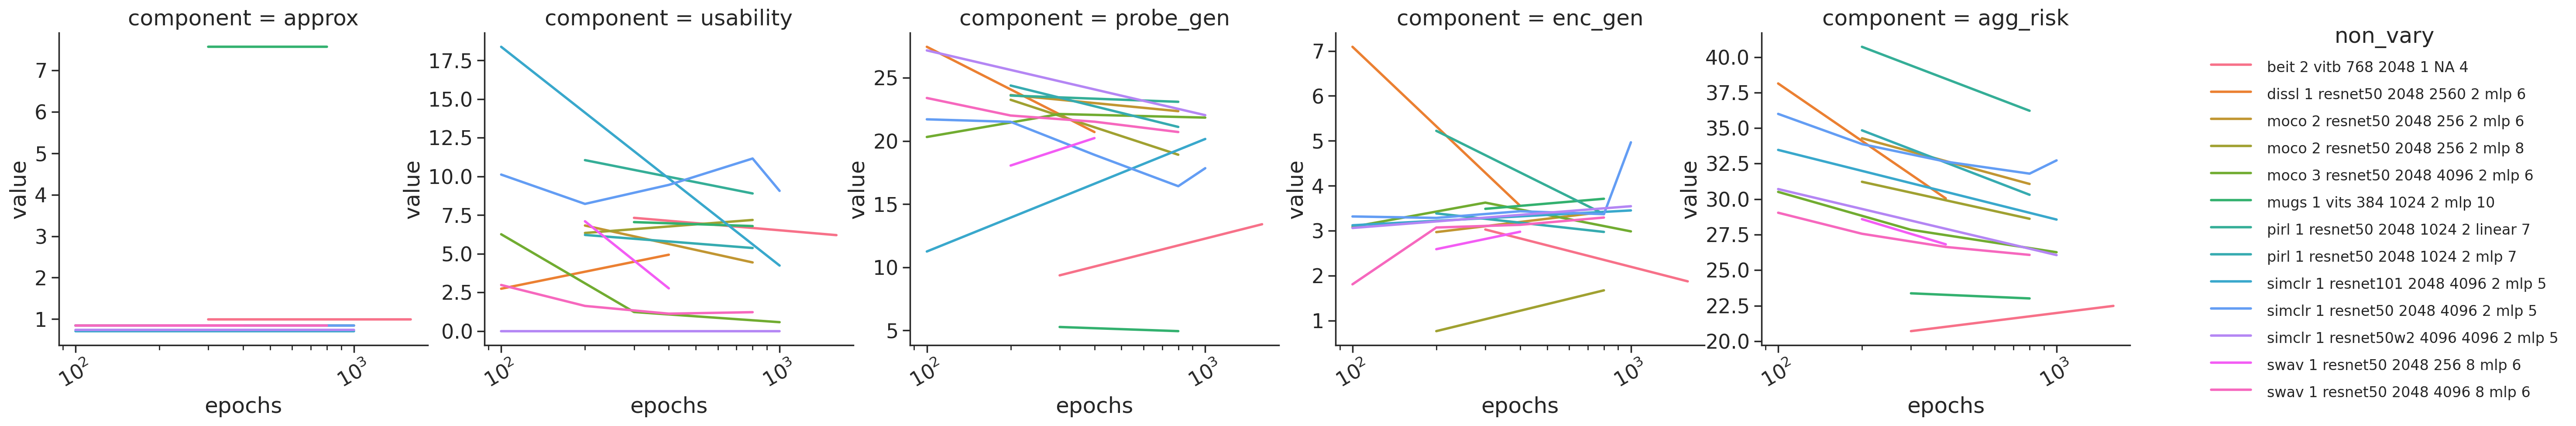

In [8]:
with plot_config():
    g = sns.relplot(data=df_epochs, x="epochs", y="value", hue="non_vary", col="component", kind="line",
                    facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    g.set_xticklabels(rotation=30)
    #g.set(yscale="log")
    g.set(xscale="log")
    #sns.move_legend(g, "lower center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))

In [8]:
ols_summary(df_epochs, "epochs", condition=['non_vary', 'np.log({treatment})'], f_outcome="log_delta")
#ols_summary(df_epochs, "epochs", condition=['non_vary', '{treatment}'], f_outcome="", alpha=0.01)
#ols_summary(df_epochs, "epochs", condition=['non_vary', 'np.log({treatment})'], f_outcome="", alpha=0.01)
#ols_summary(df_epochs, "epochs", condition=['non_vary', 'np.log({treatment})'], f_outcome="log", alpha=0.02)


                                  usability                                   
Dep. Variable:          np.log(value)   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     17.15
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           1.58e-07
Time:                        10:55:35   Log-Likelihood:                -9.7769
No. Observations:                  32   AIC:                             47.55
Df Residuals:                      18   BIC:                             68.07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
rmse: 1.9533823195653934, delta: -0.1
                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

We see that training for one epoch improves usability by -0.0043 on average over controlled studies. 
Given that all other parameters are kept fixed and assuming that there are no confounders between who performed those experiments (and released models) and the treatment
effect, we can view this as a causal relation. For example increasing training by 400 epochs, would improve usability by an estimated $1.72 \pm 0.4$ points, and the overall performance
by $1.44 \pm 0.4$ points. Note that the p value is very small.

Another reason why this can be viewed causally is that most papers from groups with much compute provides models at different epochs regardless of the hyperparameters.

### Effect of batch size
Let's analyze the effect of batch size in controlled settings

**Hypothesis** increasing the batch size should might have different impact on diffferent types of ssl models. For contrastive and clustering it will generally improve the estimation of the objective which should improve usability and probe gen. But increasing batch size also decreases the number of steps which will decrease the previous two. So it will likely have better effect for longer epochs but unclear effects when small epochs. I.e. need to controll for epochs and ssl_mode. Finally, increasing batch size might help overfitting => decrease encoder generalization.

In [9]:
df_bs = melt(get_only_vary(df, ["batch_size"], core_params))

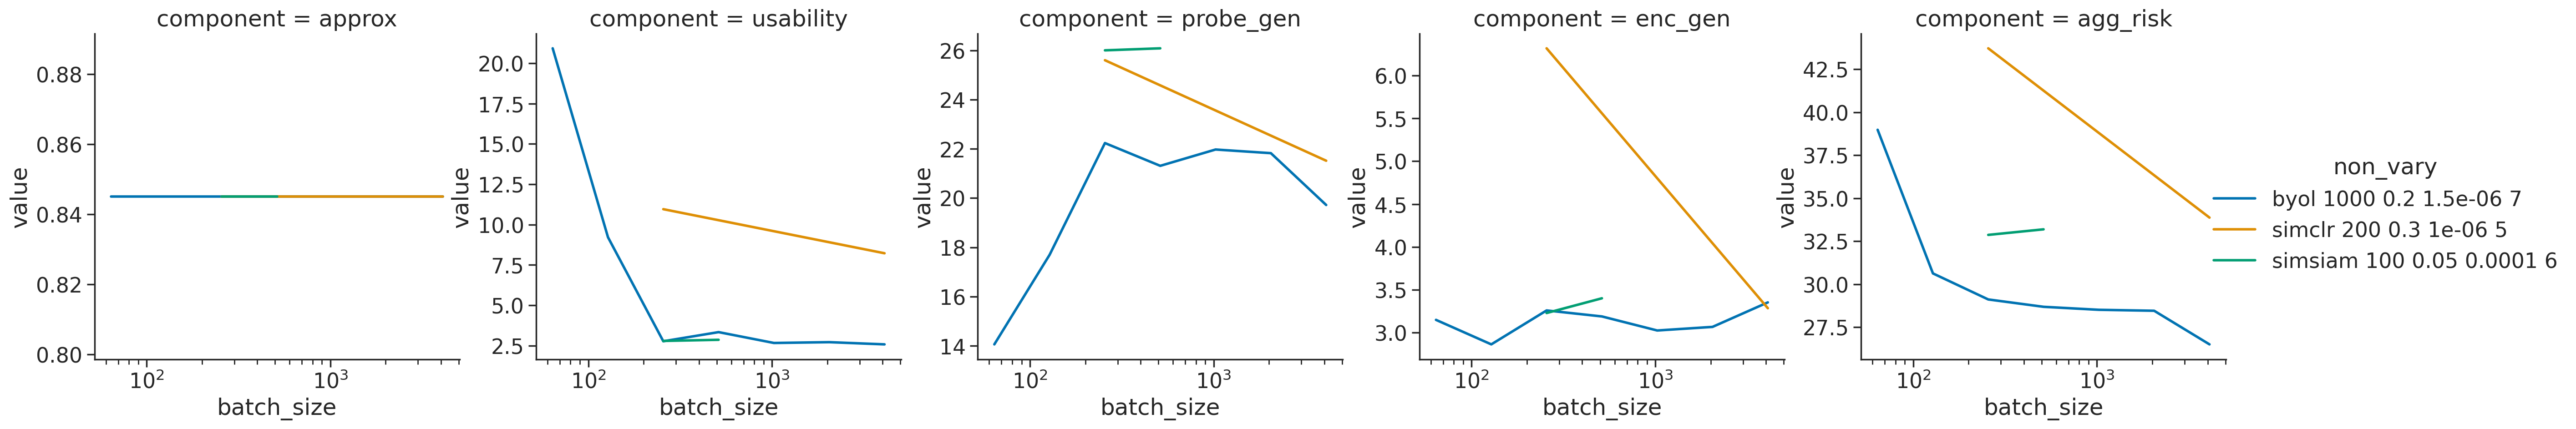

In [10]:


with plot_config():
    g = sns.relplot(data=df_bs, x="batch_size", y="value", hue="non_vary", col="component", kind="line",facet_kws={'sharey': False})
    #plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    #g.set(yscale="log")

Although we don't have many data points, it seems that probing generalization worsens while usability improves. 

In [11]:
#ols_summary(df_bs, "batch_size", outcome="value", condition=['non_vary', 'np.log({treatment})'], f_outcome="log_delta")
#ols_summary(df_bs, "batch_size", outcome="value", condition=['non_vary', '{treatment}'], f_outcome="", alpha=0.01)
ols_summary(df_bs, "batch_size", outcome="value", condition=['non_vary', 'np.log({treatment})'], f_outcome="", alpha=0.01)

                                   agg_risk                                   
Dep. Variable:                  value   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     11.91
Date:                Tue, 01 Nov 2022   Prob (F-statistic):            0.00387
Time:                        10:55:41   Log-Likelihood:                -23.205
No. Observations:                  11   AIC:                             54.41
Df Residuals:                       7   BIC:                             56.00
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
rmse: 1.994971755498215, delta: 0
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11
kurtosistest only valid for n>=20 ... continuing anyway, n=11


### Effect of multicrops

Let's analyze the effect of batch size in controlled settings

**Hypothesis** More multicrops increases the invaraince => bettter generalization of the predictor and better usability (fewer equivalence classes). Generalization of the encoder is not clear: it might have more overfitting on that data.

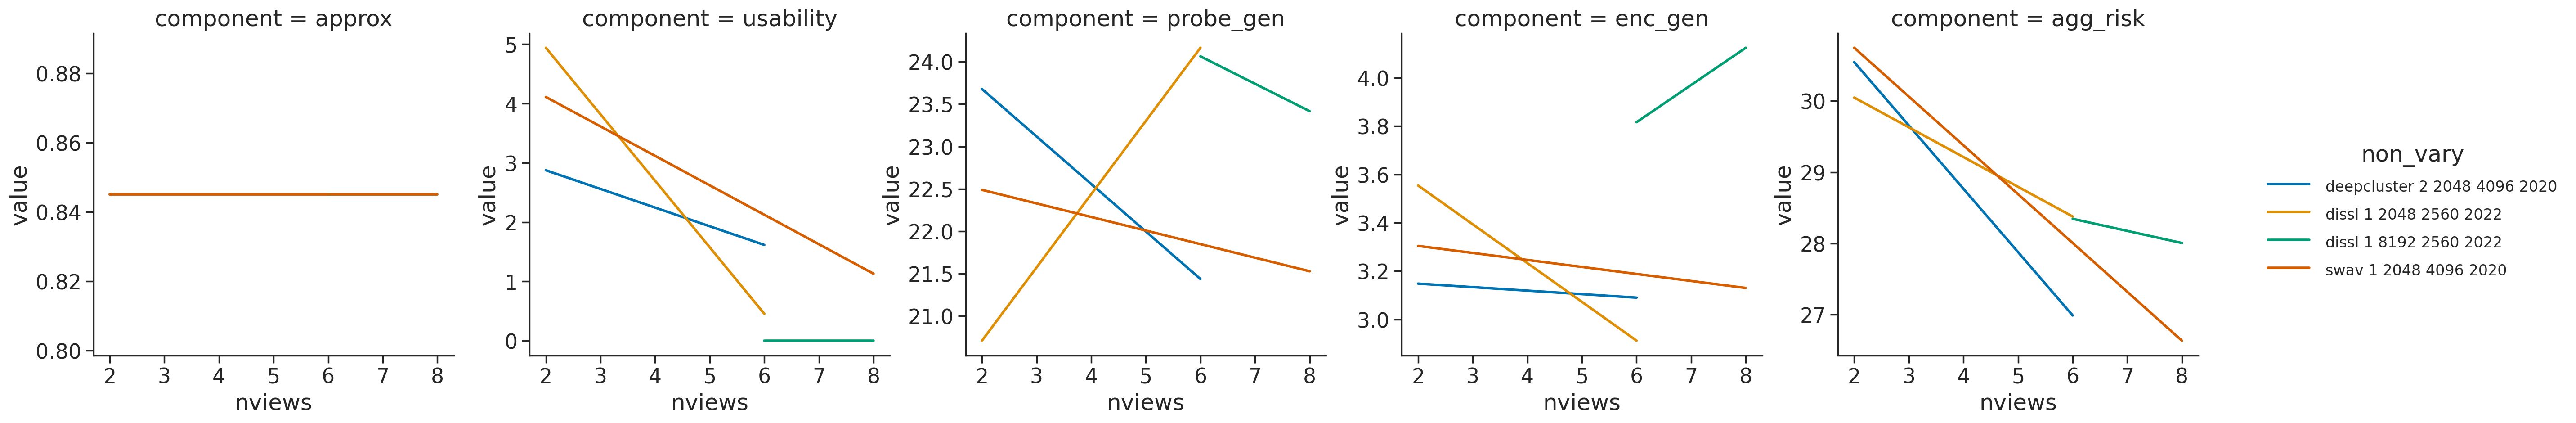

In [12]:
df_nviews = melt(get_only_vary(df, ["nviews"], core_params))

with plot_config():
    g = sns.relplot(data=df_nviews, x="nviews", y="value", hue="non_vary", col="component", kind="line",facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    #g.set(yscale="log")
    


In [13]:
#ols_summary(df_nviews, "nviews", condition=['non_vary', 'np.log({treatment})'], f_outcome="log_delta")
#ols_summary(df_nviews, "nviews", condition=['non_vary', '{treatment}'], f_outcome="log_delta")
ols_summary(df_nviews, "nviews",  condition=['non_vary', '{treatment}'], f_outcome="")
#ols_summary(df_nviews, "nviews", condition=['non_vary', 'np.log({treatment})'], f_outcome="")


                                   agg_risk                                   
Dep. Variable:                  value   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     8.721
Date:                Tue, 01 Nov 2022   Prob (F-statistic):             0.0531
Time:                        10:55:46   Log-Likelihood:                -4.3041
No. Observations:                   8   AIC:                             18.61
Df Residuals:                       3   BIC:                             19.01
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
rmse: 0.4143991312548452, delta: 0
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

kurtosistest only valid for n>=20 ... continuing anyway, n=8
divide by zero encountered in double_scalars
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8
kurtosistest only valid for n>=20 ... continuing anyway, n=8


### Effect of dimensionality

Let's analyze the effect of dimensionality in controlled settings

**Hypothesis** Higher dimensionality should increase usability but decrease generalization of the probe. Encoder generalization is not very clear.

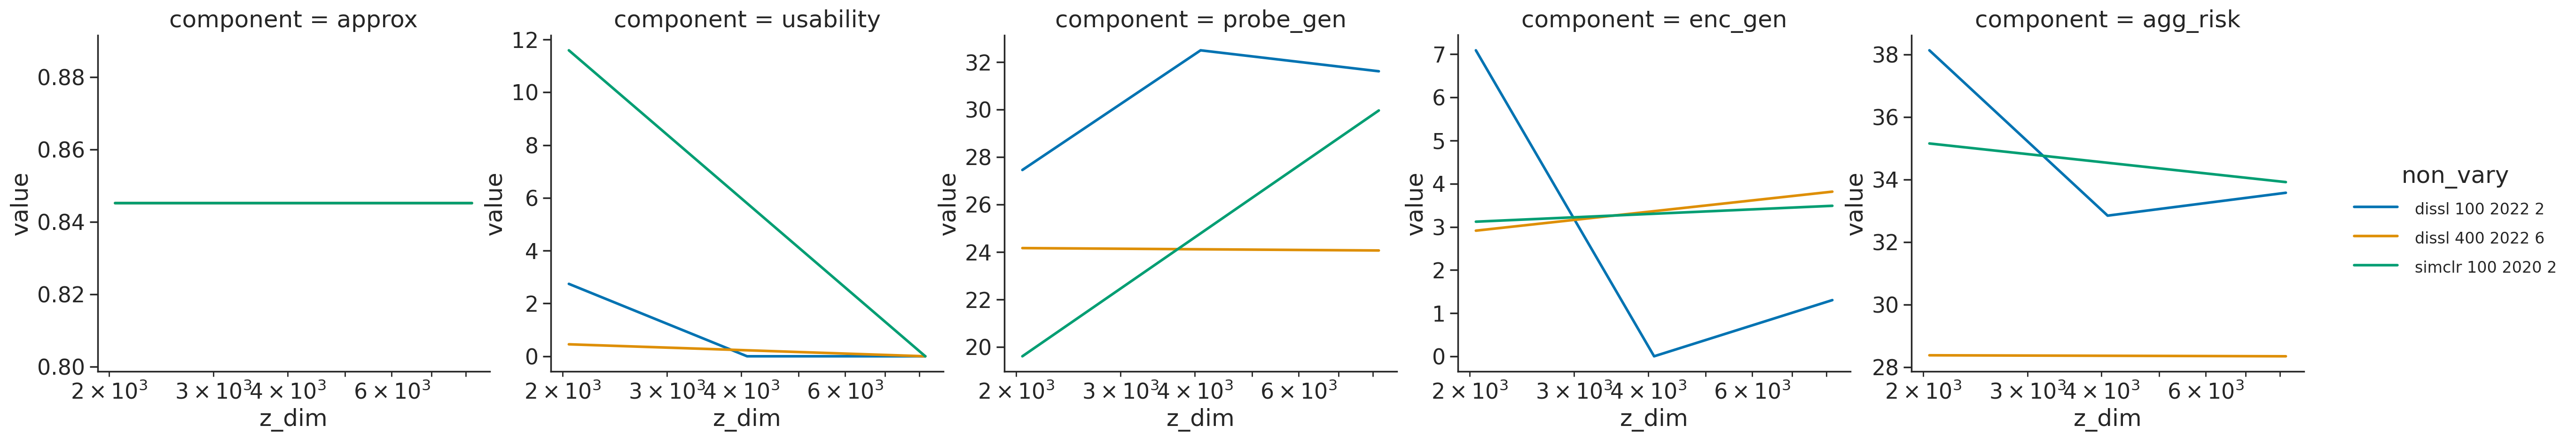

In [14]:
df_zdim = melt(get_only_vary(df, ["z_dim"], core_params))

with plot_config():
    g = sns.relplot(data=df_zdim, x="z_dim", y="value", hue="non_vary", col="component", kind="line",
                    facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    #g.set(yscale="log")
    #g.set_xticklabels(rotation=30)

In [15]:
ols_summary(df_zdim, "z_dim", condition=['non_vary', 'np.log({treatment})'], f_outcome="log_delta")
#ols_summary(df_zdim, "z_dim", condition=['non_vary', '{treatment}'], f_outcome="log_delta")
#ols_summary(df_zdim, "z_dim")
#ols_summary(df_zdim, "z_dim", condition=['non_vary', 'np.log({treatment})'], f_outcome="")


omni_normtest is not valid with less than 8 observations; 7 samples were given.
omni_normtest is not valid with less than 8 observations; 7 samples were given.
omni_normtest is not valid with less than 8 observations; 7 samples were given.


                                  usability                                   
Dep. Variable:          np.log(value)   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     4.486
Date:                Tue, 01 Nov 2022   Prob (F-statistic):              0.125
Time:                        10:55:49   Log-Likelihood:                -8.1423
No. Observations:                   7   AIC:                             24.28
Df Residuals:                       3   BIC:                             24.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
rmse: 2.3823585926935653, delta: -0.1
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

omni_normtest is not valid with less than 8 observations; 7 samples were given.
omni_normtest is not valid with less than 8 observations; 6 samples were given.
omni_normtest is not valid with less than 8 observations; 7 samples were given.


Just as hypothesized, the effect of probe generalization and suability are (the only) significant. For example we see that increasing representation dimensionality from 2000 to 8000 is predicted to improve usability by a huge $5.4$ points but decrease generalization by $3.6$ with a total gain of $1.8$.

Note that directly modifying the diemsnionality was not common under ISSL, but there are two other ways that researchers have indirectly been modifying the representation dimensionality. 

The first one is mostly done in ViT and consists of concatenating representations from different layers of a model. Let us analyse the effect of such dimensionality modification under the assumption that concatenating only impacts dimensionality.

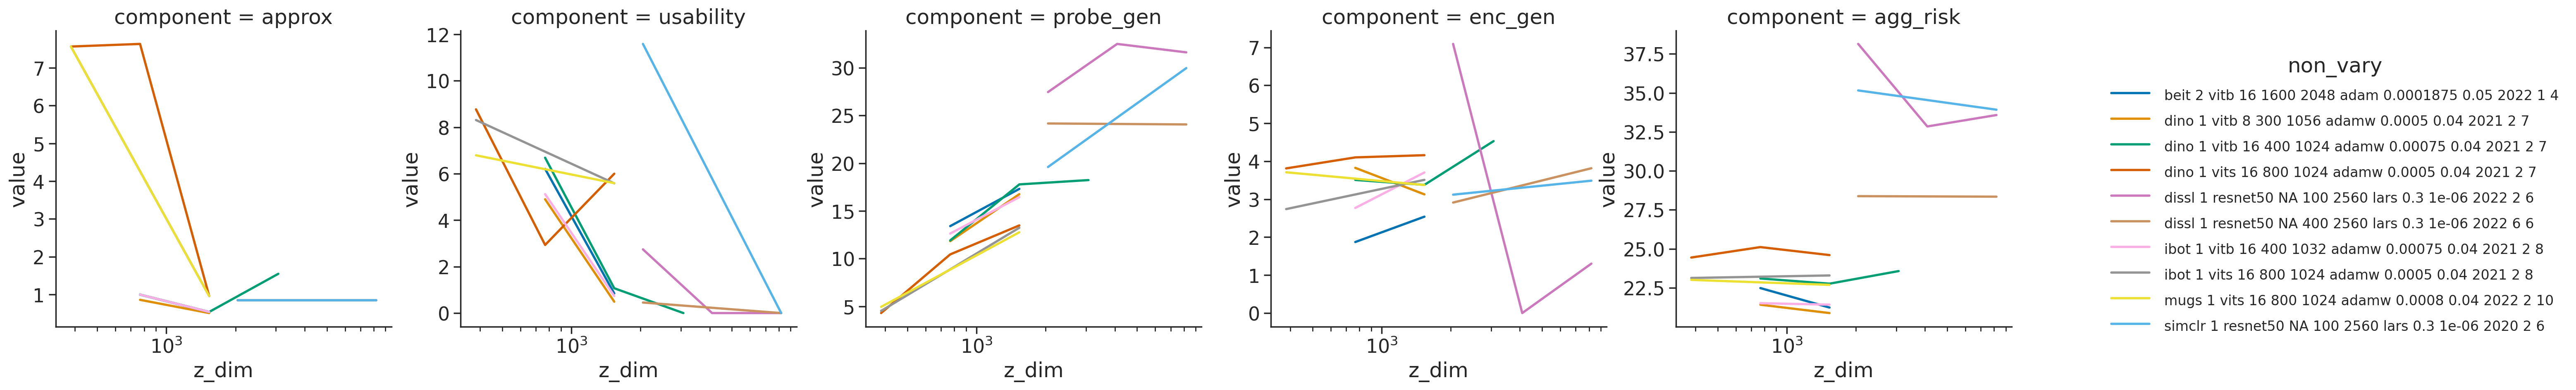

In [16]:
df_zlayer = melt(get_only_vary(df, ["z_dim","z_layer"], core_params, drop_cols=["pretraining_data"]))
#df_zlayer = df_zlayer[df_zlayer.family == "vit"]

with plot_config():
    g = sns.relplot(data=df_zlayer, x="z_dim", y="value", hue="non_vary", col="component", kind="line",
                    facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    #g.set_xticklabels(rotation=30)

In [20]:
ols_summary(df_zlayer, "z_dim", condition=['non_vary', 'np.log({treatment})'], f_outcome="log_delta")
#ols_summary(df_zlayer, "z_dim", condition=['non_vary', '{treatment}'], f_outcome="log_delta")
#ols_summary(df_zlayer, "z_dim", condition=['non_vary', 'np.log({treatment})'], f_outcome="")


                                    approx                                    
Dep. Variable:          np.log(value)   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     3.595
Date:                Tue, 01 Nov 2022   Prob (F-statistic):            0.00419
Time:                        10:57:18   Log-Likelihood:                -67.366
No. Observations:                  37   AIC:                             156.7
Df Residuals:                      26   BIC:                             174.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
rmse: 1.25850792935413, delta: 0.5343880810235643
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

We see that the the effect of changing the dimensionality due to concatenation has the same effect as changing directly the dimensionality but stronger, which suggests that concatenating is just a cheap way of increasing dimensionality.

Another indirect way researchers increase dimensionality is by using resnets of different widths, this is tyipically motivated by increasing the number of parameters of a model but also has an effect on the dimensionality of the representations.


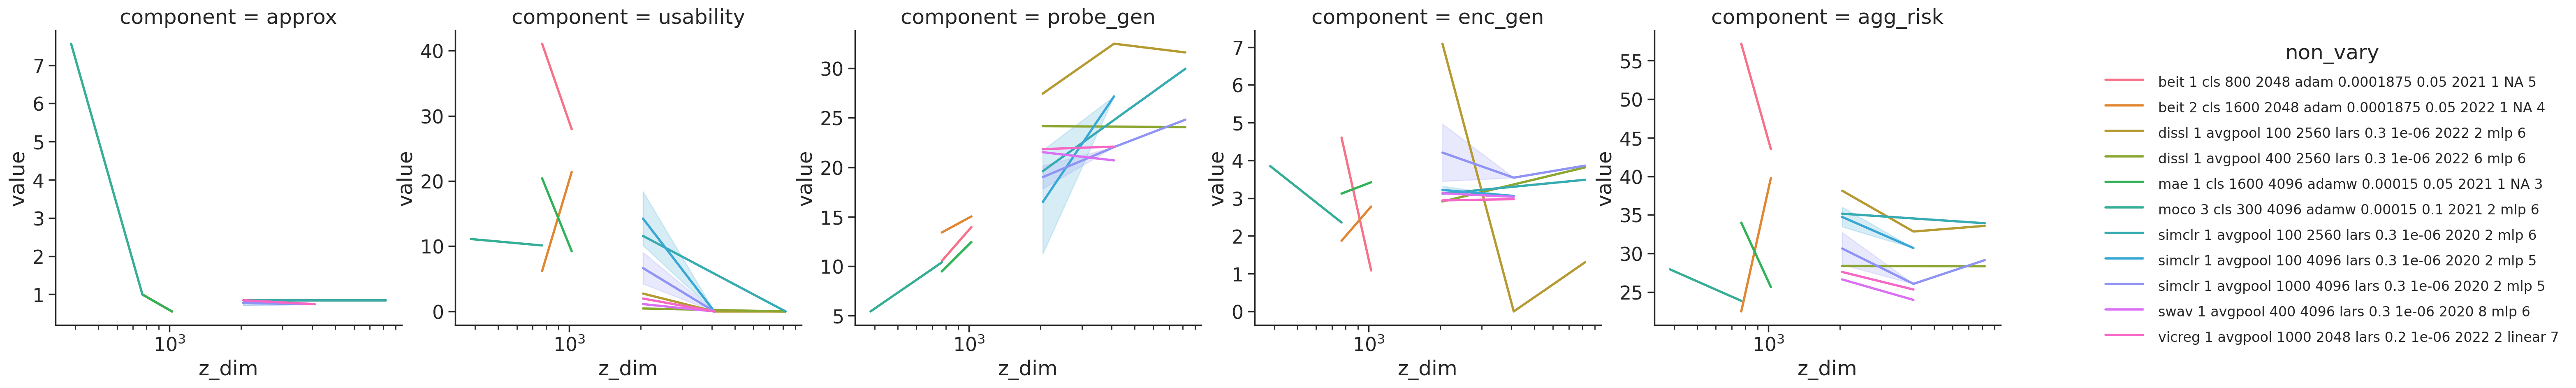

In [21]:
df_zdimarch = melt(get_only_vary(df, ["z_dim","architecture"], core_params, drop_cols=["pretraining_data"]))

with plot_config():
    g = sns.relplot(data=df_zdimarch, x="z_dim", y="value", hue="non_vary", col="component", kind="line",
                    facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    #g.set_xticklabels(rotation=30)

In [22]:
#ols_summary(df_zdimarch, "z_dim", condition=['non_vary', 'np.log({treatment})'], f_outcome="log_delta")
#ols_summary(df_zdimarch, "z_dim", condition=['non_vary', '{treatment}'], f_outcome="log_delta")
#ols_summary(df_zdimarch, "z_dim", condition=['non_vary', 'np.log({treatment})'], f_outcome="")
ols_summary(df_zdimarch, "z_dim", condition=['non_vary', '{treatment}'], f_outcome="")

                                  usability                                   
Dep. Variable:                  value   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     13.08
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           8.90e-09
Time:                        11:01:47   Log-Likelihood:                -125.65
No. Observations:                  43   AIC:                             275.3
Df Residuals:                      31   BIC:                             296.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
rmse: nan, delta: 0
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

### Effect of architecture

Now let us look more specifically at the general effect of the architecture.

#### Size
First let us consider the effect of the size of the architecture

**Hypothesis** Larger architectures should first and foremost decrease the approximation gap. Furthermore larger models typically have larger diemnsionality and thus from the previous paragraph we hypothesize that the probing generalization should worsen and the usability should improve.

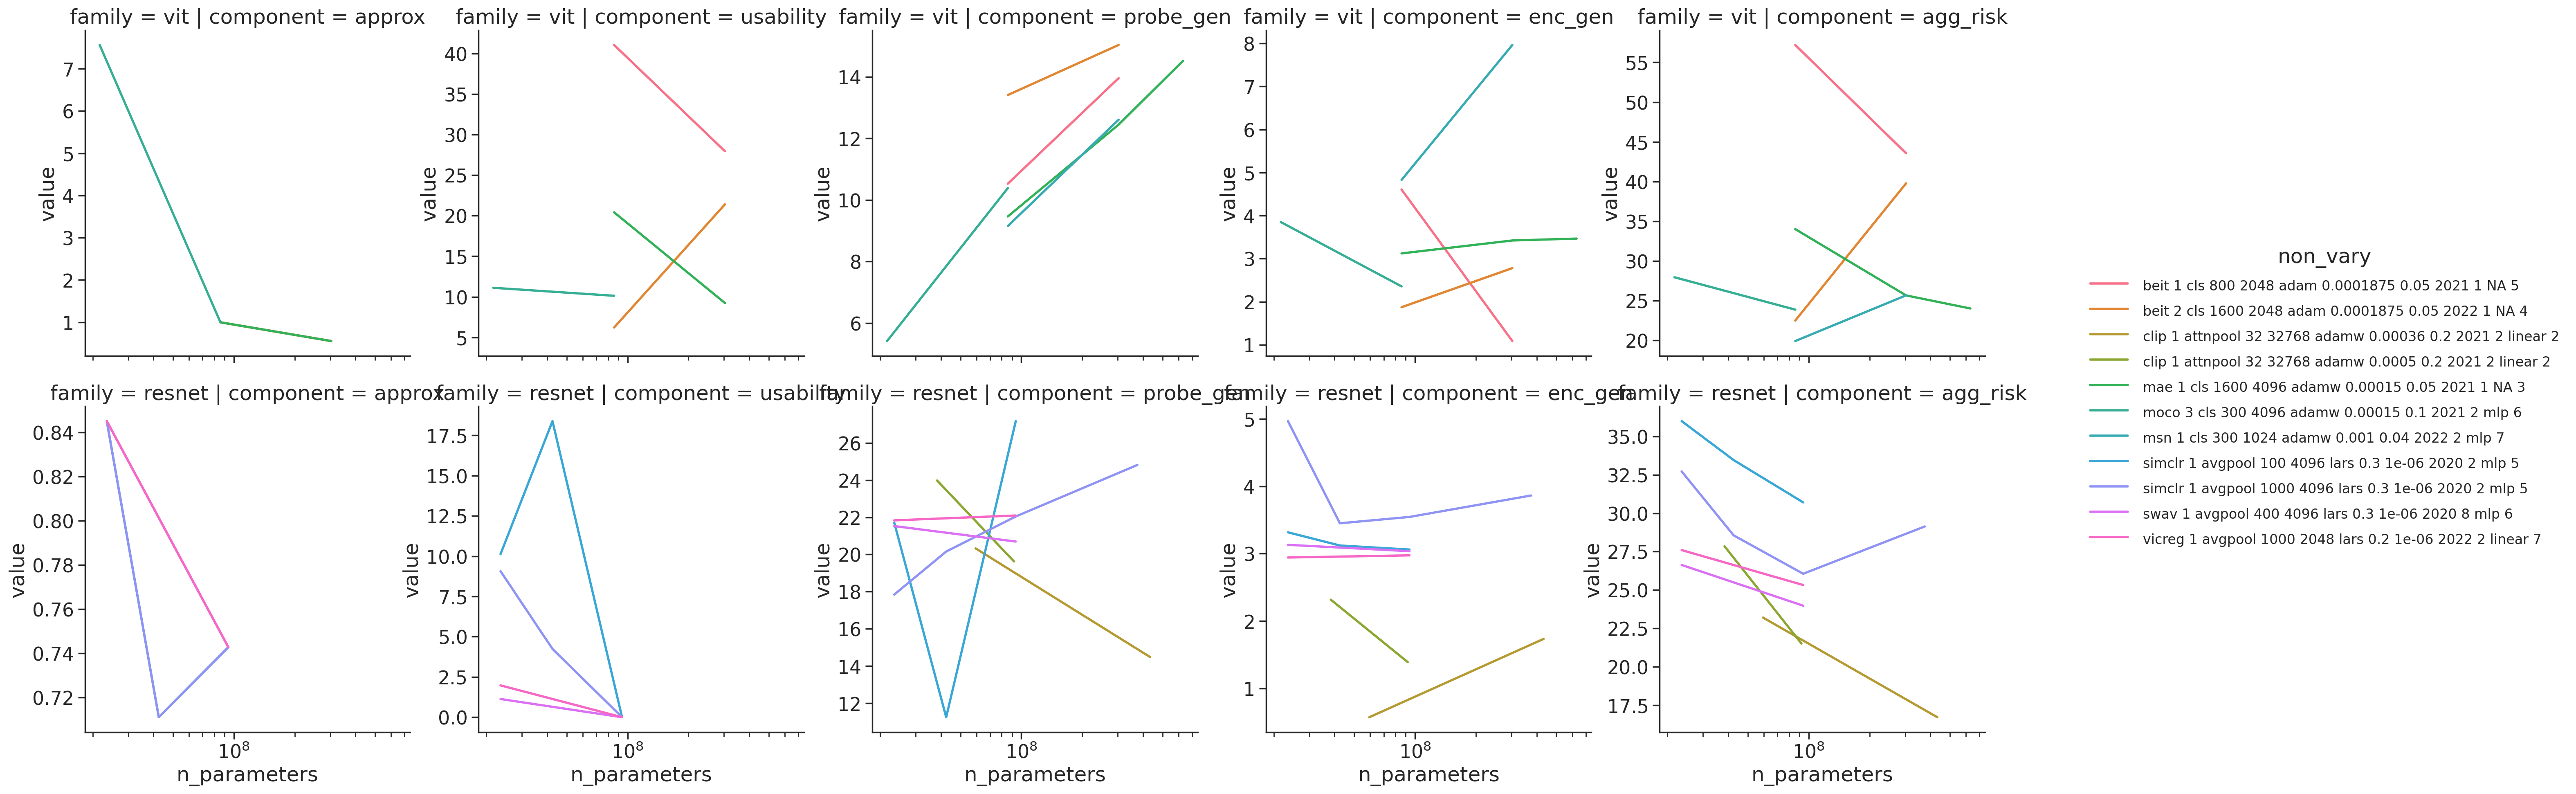

In [23]:
disregard = ["img_size","patch_size","z_dim"]
df_arch = melt(get_only_vary(df.drop(columns=disregard), 
                             ["architecture"], 
                             [c for c in core_params if c not in disregard],
                              drop_cols=["pretraining_data"]))
#df_arch.n_parameters = df_arch.n_parameters // int(5e6) * int(5e6)

with plot_config():
    g = sns.relplot(data=df_arch, x="n_parameters", y="value", hue="non_vary", col="component", row="family", kind="line",
                    facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)
    g.set(xscale="log")
    #g.set_xticklabels(rotation=30)

We see that the clearest effect is for the approximation gap which decreases drastically for larger models. Note that it is not clear whether the effect of number of parameters is linear and so the following analysis is not great.

In [24]:
# TODO: check why getting nan

In [25]:
#ols_summary(df_arch, "n_parameters", condition=['non_vary', 'np.log({treatment})'], f_outcome="log_delta")
#ols_summary(df_arch, "n_parameters", condition=['non_vary', '{treatment}'], f_outcome="log_delta")
ols_summary(df_arch, "n_parameters", condition=['non_vary', 'np.log({treatment})'], f_outcome="")
#ols_summary(df_arch, "n_parameters", condition=['non_vary', '{treatment}'], f_outcome="")

We see that that when using a linear relationship approximation does not seem meaningfull, lewt us instead use log number of parameters as in the above plots. 

We now have that the number of parameters has a high impact on the approximation gap, as expected. In particular we have that increasing the log10 parameters by one, i.e., multiplying the number parameters by 10 will improve approximation by $\approx-6$. 

#### ViT vs ResNet
Now that we have considered the effect of number of parameters, let us consider the effect of using ViT vs ResNet

**Hypothesis** This is very hard to say, but the encoder generalization likely worsen when going to ViT while approx error probably improves.

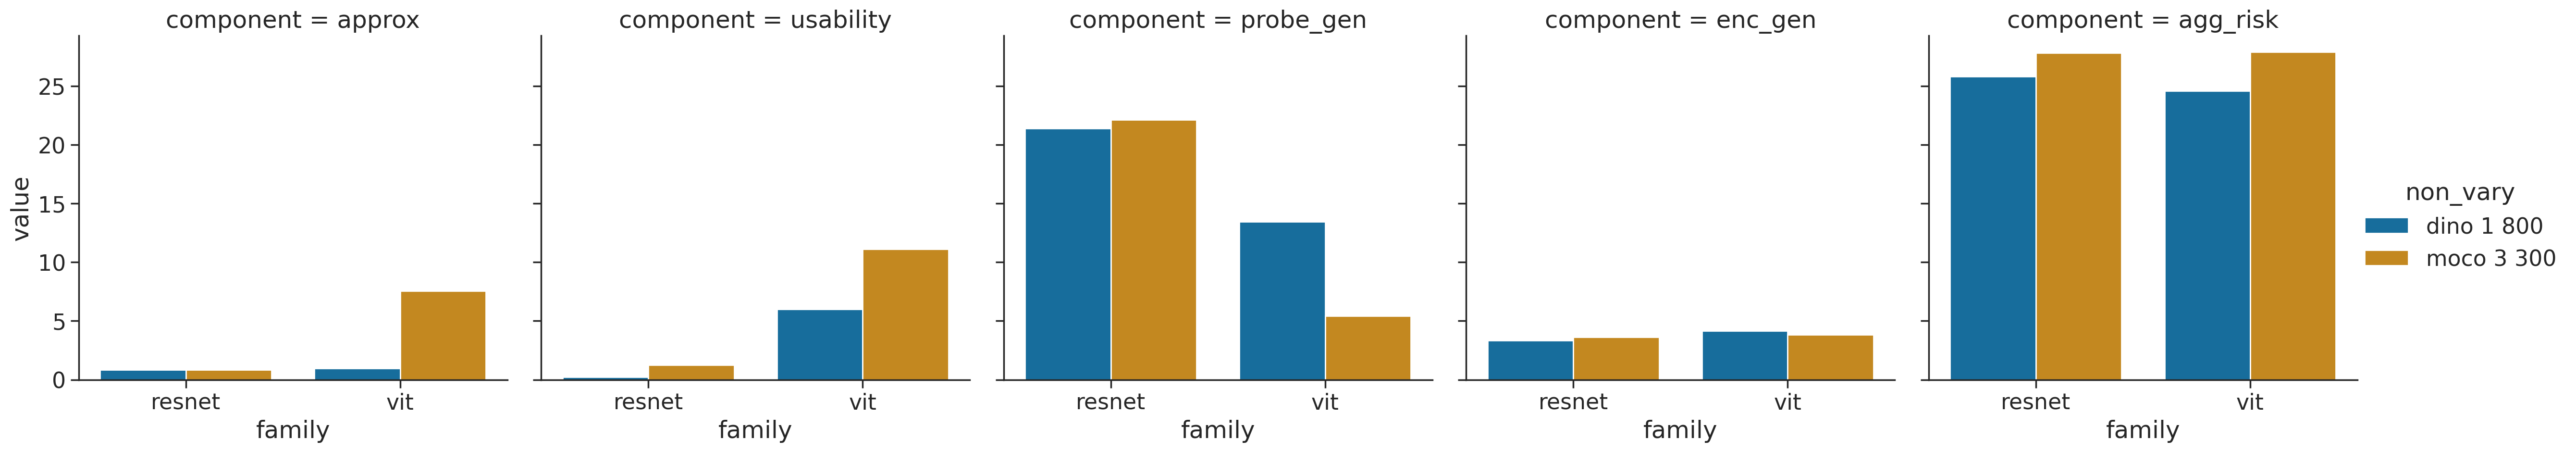

In [26]:
curr_df = df.copy()
curr_df.n_parameters = curr_df.n_parameters // int(30e6) * int(30e6) # coarse grains

# varying over the 
df_family = melt(get_only_vary(curr_df, ["family"],  ["family","objective","n_parameters","version","epochs"]))
df_family= df_family[~df_family.top1acc_in1k_official.isna()] # don't take all the vit models that don't have the official z_layer


with plot_config():
    g = sns.catplot(data=df_family, x="family", y="value", hue="non_vary", col="component", kind="bar",
                    facet_kws={'sharey': False})
    #plt.setp(g._legend.get_texts(), fontsize=12)

In [27]:
#ols_summary(df_family, "family", condition=['non_vary', '{treatment}'], f_outcome="log_delta")
ols_summary(df_family, "family", condition=['non_vary', '{treatment}'], f_outcome="")

omni_normtest is not valid with less than 8 observations; 4 samples were given.
omni_normtest is not valid with less than 8 observations; 4 samples were given.
omni_normtest is not valid with less than 8 observations; 4 samples were given.
omni_normtest is not valid with less than 8 observations; 4 samples were given.
omni_normtest is not valid with less than 8 observations; 4 samples were given.


We see that there seems to be nothing significative, most likely because we only have 2 models that are trained on RN and ViT. This will likely be more conclusive when performing causal analysis. Note furethermore that there are other parameters (training hyperparameters) that we did not control.

#### Effect of patch size

Another important component of architecture that is not taken into account by number ofa parameters and family, is the patch size of ViT. 

**Hypothesis** This is very hard to say, but the encoder generalization likely worsen when going to ViT while approx error probably improves.

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

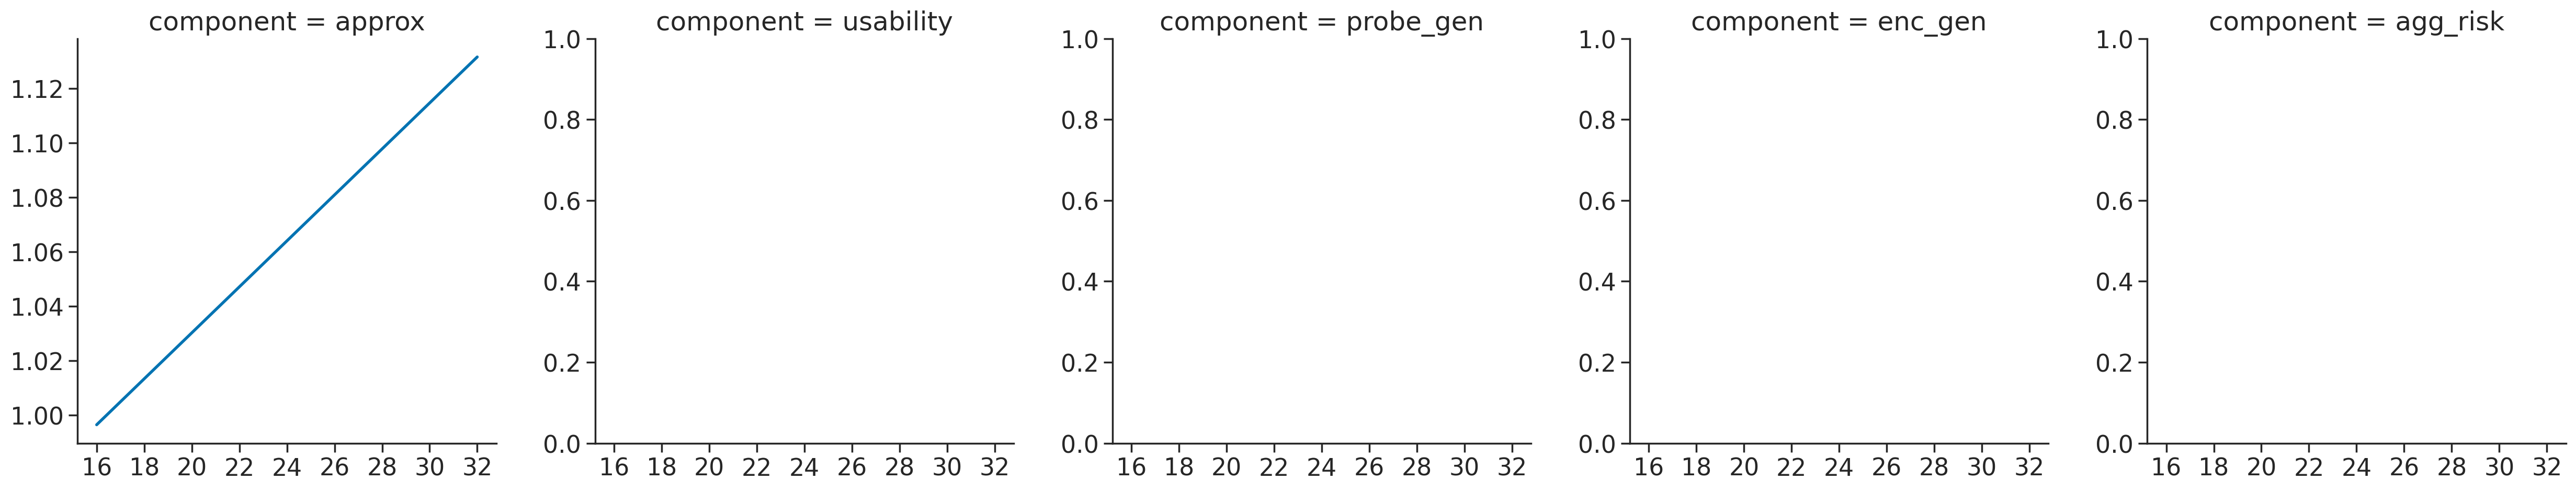

In [28]:

df_patch = melt(get_only_vary(df, ["patch_size"],  core_params, drop_cols=["data"]))#,
df_patch = df_patch[df_patch.family == "vit"]
df_patch = df_patch[~df_patch.value.isna()]

with plot_config():
    g = sns.relplot(data=df_patch, x="patch_size", y="value", hue="non_vary", col="component", kind="line",
                    facet_kws={'sharey': False})
    plt.setp(g._legend.get_texts(), fontsize=12)

In [29]:
# dff = get_only_vary(curr_df, ["family"],  ["family","objective","n_parameters","version","epochs"])
# dfff = dff[(dff.objective == "dino") &  (dff.family == "vit")]
# dfff.loc[:, (dfff != dfff.iloc[0]).any()] 

In [30]:
df_patch.patch_size = df_patch.patch_size.astype("int")
#ols_summary(df_patch, "patch_size", condition=['non_vary', 'np.log({treatment})'], f_outcome="log_delta")
ols_summary(df_patch, "patch_size", condition=['non_vary', '{treatment}'], f_outcome="log_delta")
#ols_summary(df_patch, "patch_size", condition=['non_vary', 'np.log({treatment})'], f_outcome="")
#ols_summary(df_patch, "patch_size", condition=['non_vary', '{treatment}'], f_outcome="")

omni_normtest is not valid with less than 8 observations; 3 samples were given.
divide by zero encountered in double_scalars
divide by zero encountered in divide
invalid value encountered in double_scalars
omni_normtest is not valid with less than 8 observations; 3 samples were given.
divide by zero encountered in double_scalars
divide by zero encountered in divide
invalid value encountered in double_scalars
omni_normtest is not valid with less than 8 observations; 4 samples were given.
omni_normtest is not valid with less than 8 observations; 4 samples were given.
omni_normtest is not valid with less than 8 observations; 4 samples were given.
omni_normtest is not valid with less than 8 observations; 4 samples were given.


                                   agg_risk                                   
Dep. Variable:          np.log(value)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.316e+04
Date:                Tue, 01 Nov 2022   Prob (F-statistic):            0.00340
Time:                        11:02:35   Log-Likelihood:                 20.188
No. Observations:                   4   AIC:                            -34.38
Df Residuals:                       1   BIC:                            -36.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
rmse: 0.007856765602572048, delta: 18.07515756707442
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

We see that the aggregated performance significantly improves with smaller patch_size on all components! 

### Effect of projection 

Another hyperparameter that people have found to be very important is the architecture of the projection head.

**Hypothesis**: from ISSL we know that non linear projection heads on only branch can help optimization of the representations (usability and probing generalization), but on both sides they do not ensure linear predictability anymore (drop on usability). 

#### Architecture

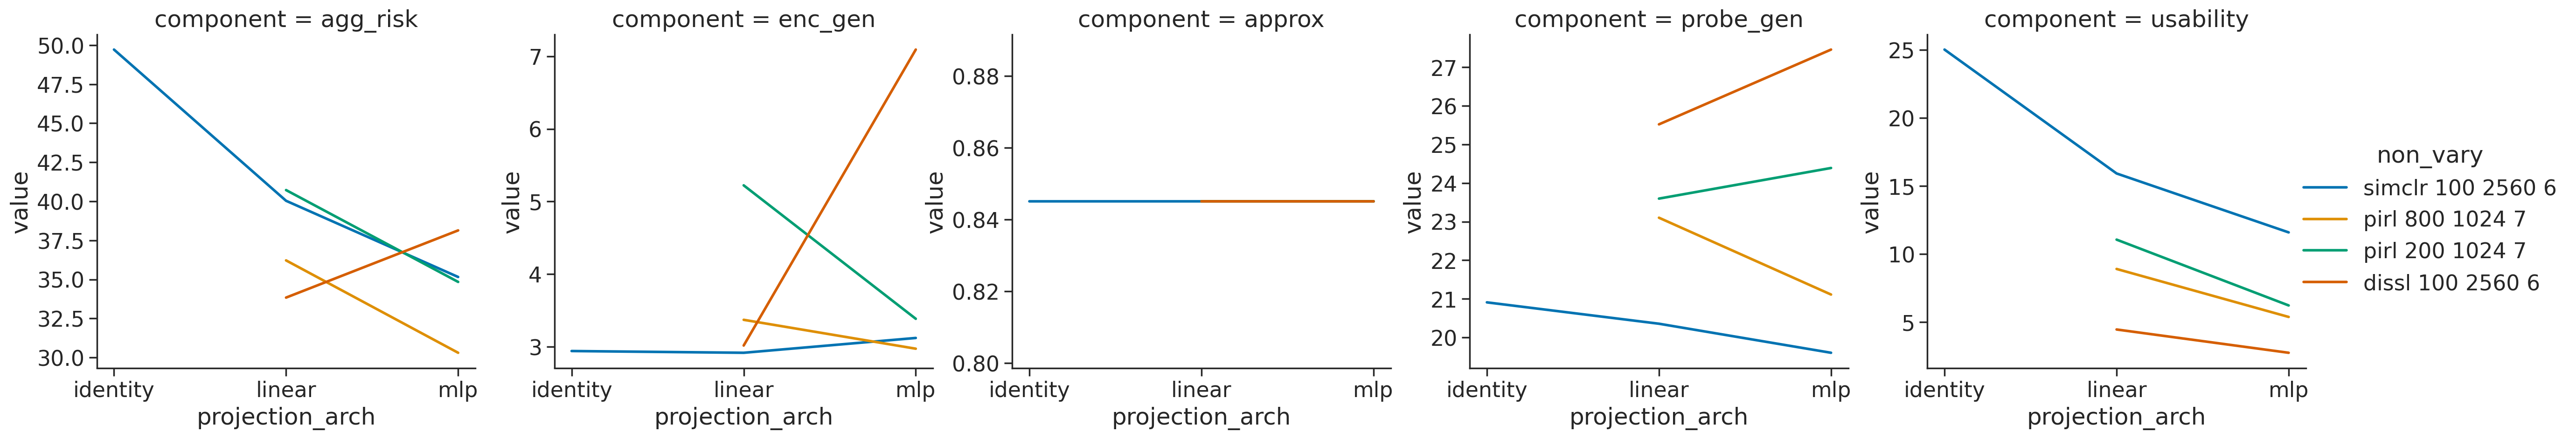

In [31]:
df_proj = melt(get_only_vary(df, ["projection_arch"], core_params, 
                            drop_cols=["year","optimizer","learning_rate", 'weight_decay']))

with plot_config():
    g=sns.relplot(data=df_proj.sort_values("projection_arch"), x="projection_arch", y="value", hue="non_vary", 
                  kind="line", col="component", facet_kws={'sharey': False})
#sns.move_legend(g, "upper center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))

In [32]:
ols_summary(df_proj, "projection_arch", condition=['non_vary', '{treatment}'], f_outcome="log_delta")
#ols_summary(df_proj, "projection_arch", condition=['non_vary', '{treatment}'], f_outcome="")

kurtosistest only valid for n>=20 ... continuing anyway, n=9
divide by zero encountered in double_scalars
kurtosistest only valid for n>=20 ... continuing anyway, n=9
kurtosistest only valid for n>=20 ... continuing anyway, n=9


                                  usability                                   
Dep. Variable:          np.log(value)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     126.7
Date:                Tue, 01 Nov 2022   Prob (F-statistic):            0.00109
Time:                        11:02:37   Log-Likelihood:                 15.430
No. Observations:                   9   AIC:                            -18.86
Df Residuals:                       3   BIC:                            -17.68
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
rmse: 0.5456201018344751, delta: -0.1
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

kurtosistest only valid for n>=20 ... continuing anyway, n=9
kurtosistest only valid for n>=20 ... continuing anyway, n=9
kurtosistest only valid for n>=20 ... continuing anyway, n=9


We see that usability improves while probe gen worsen's.
One issues is that with simclr and dissl we don't actually differentiate between proj of the teacher or student.
Let's consider the more fine grained now.

In [33]:
dissl_proj = ["dissl_resnet50_dNone_e100_m2_headTMlpSMlp","dissl_resnet50_dNone_e100_m2_headTLinSLin","dissl_resnet50_dNone_e100_m2"]
dissl_proj = [d.lower() for d in dissl_proj ]
df_dissl_proj = df.loc[df.index.isin(dissl_proj)]
df_dissl_proj[COMPONENTS]

approx  usability  probe_gen  \
enc                                                                         
dissl_resnet50_dnone_e100_m2               0.845089   2.742500  27.458411   
dissl_resnet50_dnone_e100_m2_headtlinslin  0.845089   4.453596  25.521316   
dissl_resnet50_dnone_e100_m2_headtmlpsmlp  0.845089   5.197215  24.735696   

                                            enc_gen   agg_risk  
enc                                                             
dissl_resnet50_dnone_e100_m2               7.091999  38.137999  
dissl_resnet50_dnone_e100_m2_headtlinslin  3.016001  33.836001  
dissl_resnet50_dnone_e100_m2_headtmlpsmlp  3.180000  33.958000

We see that for dissl it has little effect, with the best being the asummentric proposed in ISSL.

In [34]:
simclr_proj=df.query("`objective` == 'simclr' and `nviews` == 2 and `epochs`==100 and `z_dim` == 2048 and `architecture`=='resnet50'")
simclr_proj[COMPONENTS]

approx  usability  probe_gen  \
enc                                                                            
simclr_resnet50_dnone_e100_m2                 0.845089  11.587326  19.603585   
simclr_resnet50_dnone_e100_m2_headtlinslin    0.845089  15.916661  20.356250   
simclr_resnet50_dnone_e100_m2_headtmlpslin    0.845089  11.141327  24.059585   
simclr_resnet50_dnone_e100_m2_headtmlpsmlp    0.845089   8.687548  22.393363   
simclr_resnet50_dnone_e100_m2_headtnonesnone  0.845089  25.019143  20.909768   
simclr_rn50_bs4096_ep100                      0.845089  10.121944  21.714966   

                                               enc_gen   agg_risk  
enc                                                                
simclr_resnet50_dnone_e100_m2                 3.119999  35.156000  
simclr_resnet50_dnone_e100_m2_headtlinslin    2.915999  40.033999  
simclr_resnet50_dnone_e100_m2_headtmlpslin    3.425997  39.471999  
simclr_resnet50_dnone_e100_m2_headtmlpsmlp    3.253999  35.179999  
simclr_resnet50_dnone_e100_m2_headtnonesnone  2.939999  49.713999  
simclr_rn50_bs4096_ep100                      3.316000  35.997999

We see that for simclr it has a large effect, with the best being by far MLP / MLP, and MLP/LIN giving little gains compared to LIN/LIN.

### Effect of data

Until now we have not talked about an important part of the SSL pipeline: the pretraining data. We investigate that now.

#### Effect of data percentage

First let us consider the effect of training on more data from the same distribution.

**Hypothesis** Training on more in distribution data should improve mostly encoder generalization. 

Unfortunately there will also be a mistake on how we evaluate because models that were trained on a subset of imagenet will actually have a encoder generalization component in the usability (because the training set of imagenet will now not have been seen). As a result we will actually likely see an improvement on usability and a **decrease** in encoder generalization when increasing the pretraining data (because usability now takes into account encoder generalization and so the delta will be smaller when compariong to pure encoder generalization). This is a very unfortunate problement which doesn't seem to have a simple solution, I think I will thus drop those risk decomposition results.

In [35]:
df_dataperc = melt(get_only_vary(df, ["pretraining_data"], core_params, 
                            drop_cols=[]))
# only select if taking percentages
df_dataperc = df_dataperc.loc[["%" in d for d in df_dataperc.pretraining_data],:]

if len(df_dataperc) > 0:
    with plot_config():
        g=sns.catplot(data=df_dataperc, x="pretraining_data", y="value", hue="non_vary", 
                      kind="bar", col="component", facet_kws={'sharey': False})
#sns.move_legend(g, "upper center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))

#### Effect of IN20k

Prewviously we saw the effect of the training size (percentage) now let us consider different datasets.

**hypothesis** if the distribution of the training set there will be some shift which will likely worst then encoder generalization. But at the same time if the data increases we will likely see better usability and probing generalization.

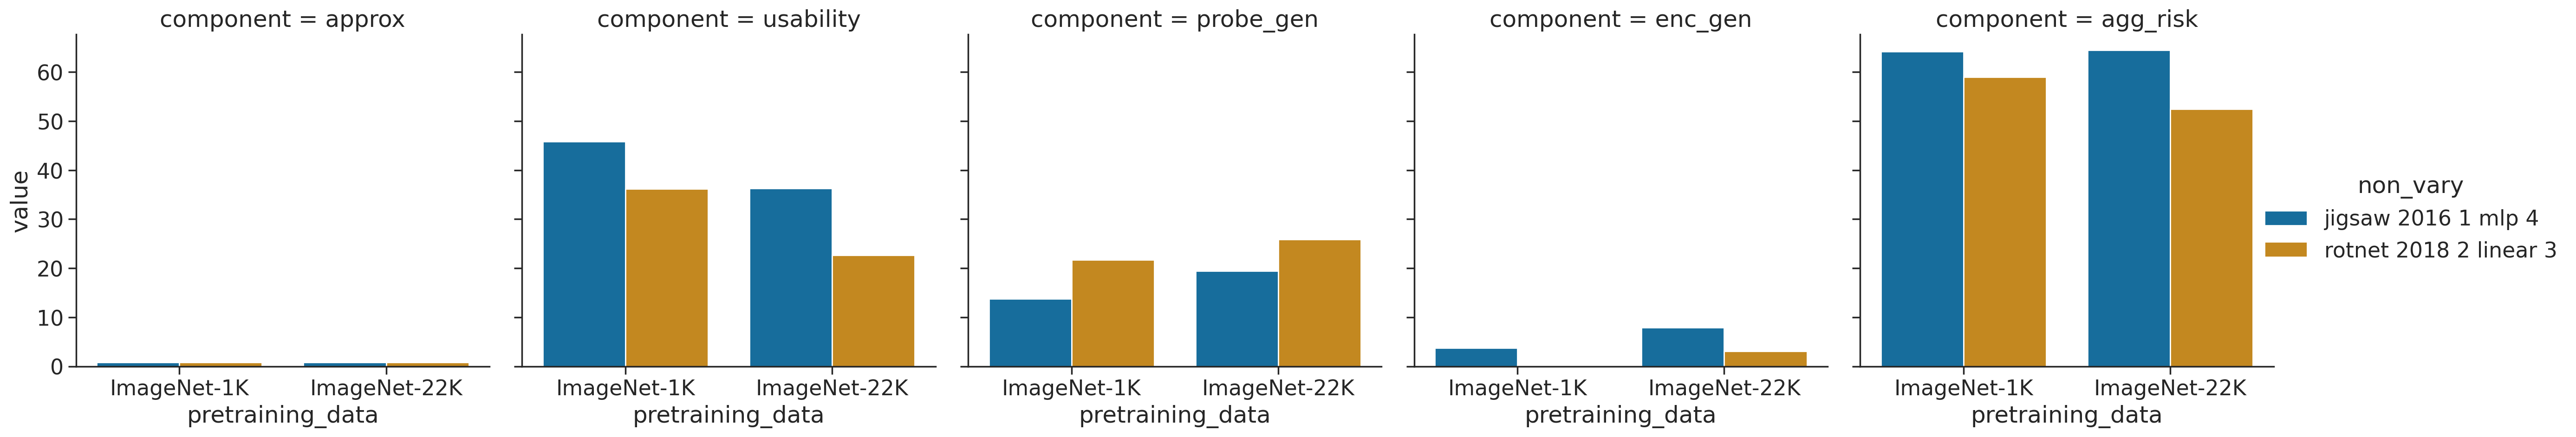

In [36]:
df_data = melt(get_only_vary(df, ["pretraining_data"], core_params, 
                            drop_cols=[]))
# only select if not taking percentages
df_data = df_data.loc[["%" not in d for d in df_data.pretraining_data ],:]

if len(df_data) > 0:
    with plot_config():
        g=sns.catplot(data=df_data, x="pretraining_data", y="value", hue="non_vary", 
                      kind="bar", col="component", facet_kws={'sharey': False})
#sns.move_legend(g, "upper center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))

In [37]:
ols_summary(df_data, "pretraining_data", condition=['non_vary', '{treatment}'], f_outcome="log_delta")
#ols_summary(df_data, "pretraining_data", condition=['non_vary', '{treatment}'], f_outcome="")

omni_normtest is not valid with less than 8 observations; 4 samples were given.
divide by zero encountered in double_scalars
omni_normtest is not valid with less than 8 observations; 4 samples were given.
omni_normtest is not valid with less than 8 observations; 4 samples were given.
omni_normtest is not valid with less than 8 observations; 3 samples were given.
divide by zero encountered in double_scalars
divide by zero encountered in divide
invalid value encountered in double_scalars
omni_normtest is not valid with less than 8 observations; 4 samples were given.


Although the trend are as predicted, we see that the results are not statistically significant, likely because we only have 2 models. THis will probably be solved once we do a general caussal discovery.

#### Effect of finetuning

In [38]:
curr_df = df.copy()
curr_df["is_finetuned"] = curr_df.finetuning_data.isna()
df_ft = melt(get_only_vary(curr_df, ["is_finetuned"], core_params+["is_finetuned"], 
                            drop_cols=[]))

if len(df_ft) > 0:
    with plot_config():
        g=sns.catplot(data=df_ft, x="is_fintetuned", y="value", hue="non_vary", 
                      kind="bar", col="component", facet_kws={'sharey': False})
#sns.move_legend(g, "upper center", bbox_to_anchor=(0., 0.5, 0.7, 1.102))